# Decision Tree - EDA and Training

#### Import Packages and Dataset


In [164]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [165]:
# Import DataSet

total_data = pd.read_csv('/workspaces/gustavolima-decisiontree/data/raw/decision-tree_diabetes.csv')
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### DataSet Analysis

##### Dataset Information

In [166]:
# Dataset Shape
total_data.shape

(768, 9)

In [167]:
# Dataset Data Info
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [168]:
# Duplicate Removal
if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates()

#### Univariate Numeric Analysis

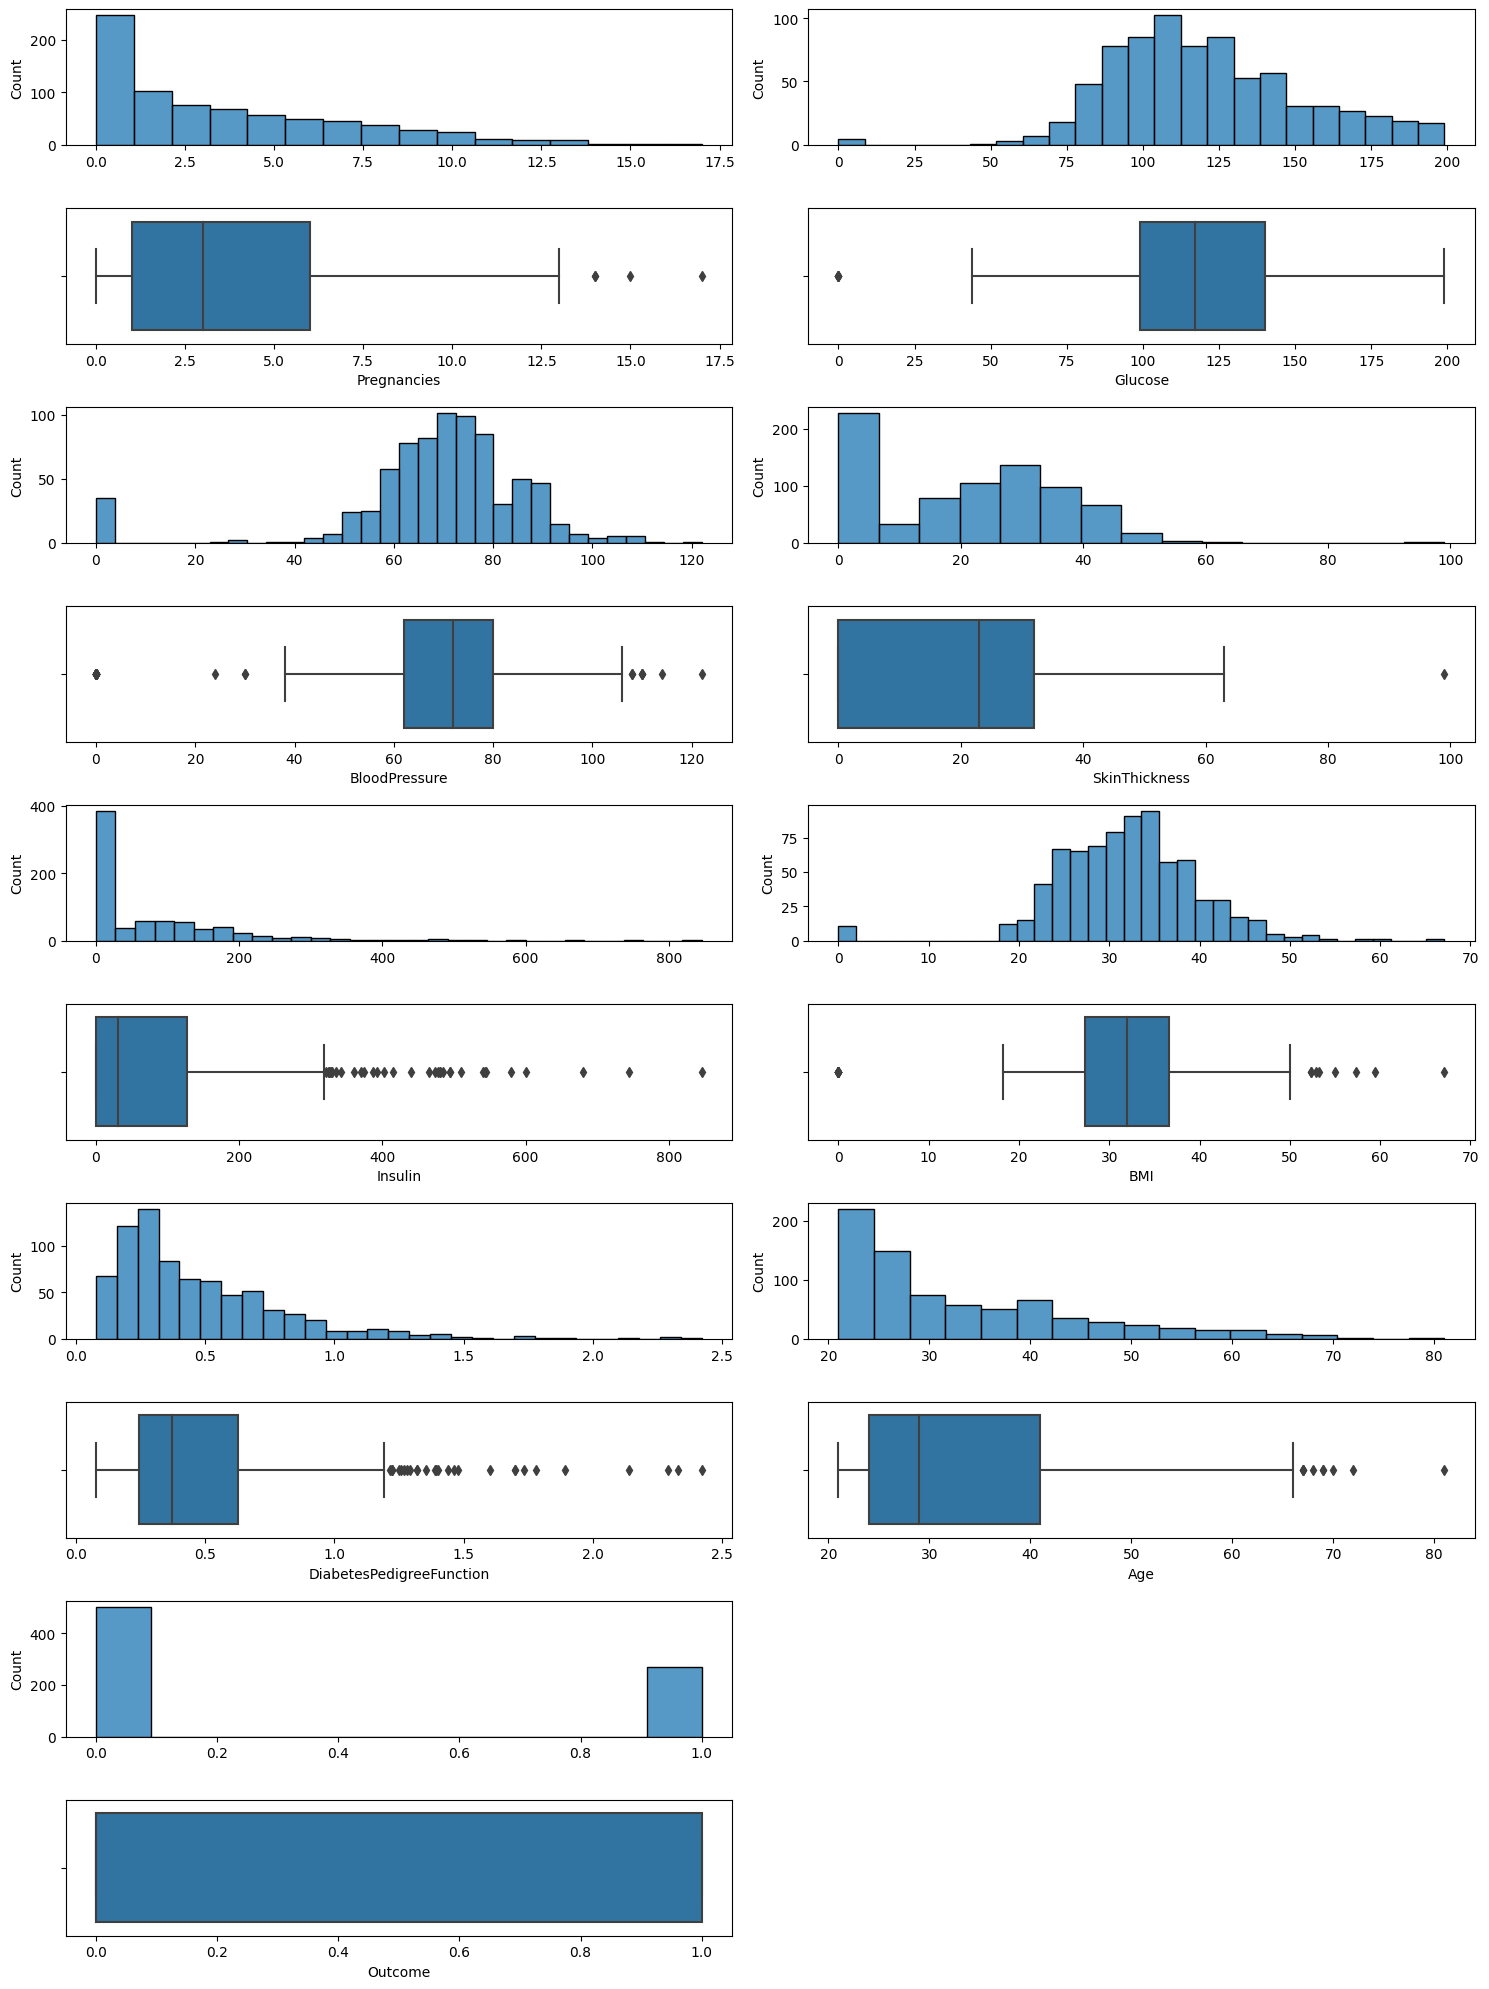

In [169]:
# Univariate Numeric Analysis

# Gather all columns in a variable-
column_names = total_data.columns

# Create Figure
fig, axis = plt.subplots(10, 2, figsize=(15, 20))

# Plot the Data
# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(column_names):
    if i % 2 == 0 :
        sns.histplot(ax=axis[i, 0], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i + 1, 0 ], data=total_data, x=col_name)
    else :
        sns.histplot(ax=axis[i - 1, 1], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data=total_data, x=col_name)
fig.delaxes(axis[8,1])
fig.delaxes(axis[9,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Looking at the Numeric Data Analysis:

- There are a few 0 values, which are guaranteed errors, as if their value is 0, it means you either dead or don't exist (Glucose, Bloodpressure, BMI)
- Apart from that, data is distrubuted normally in many of the cases
- The present outliers (other than 0) are OK and important for the Data Analysis

#### Multivariate Numerical Data Analysis

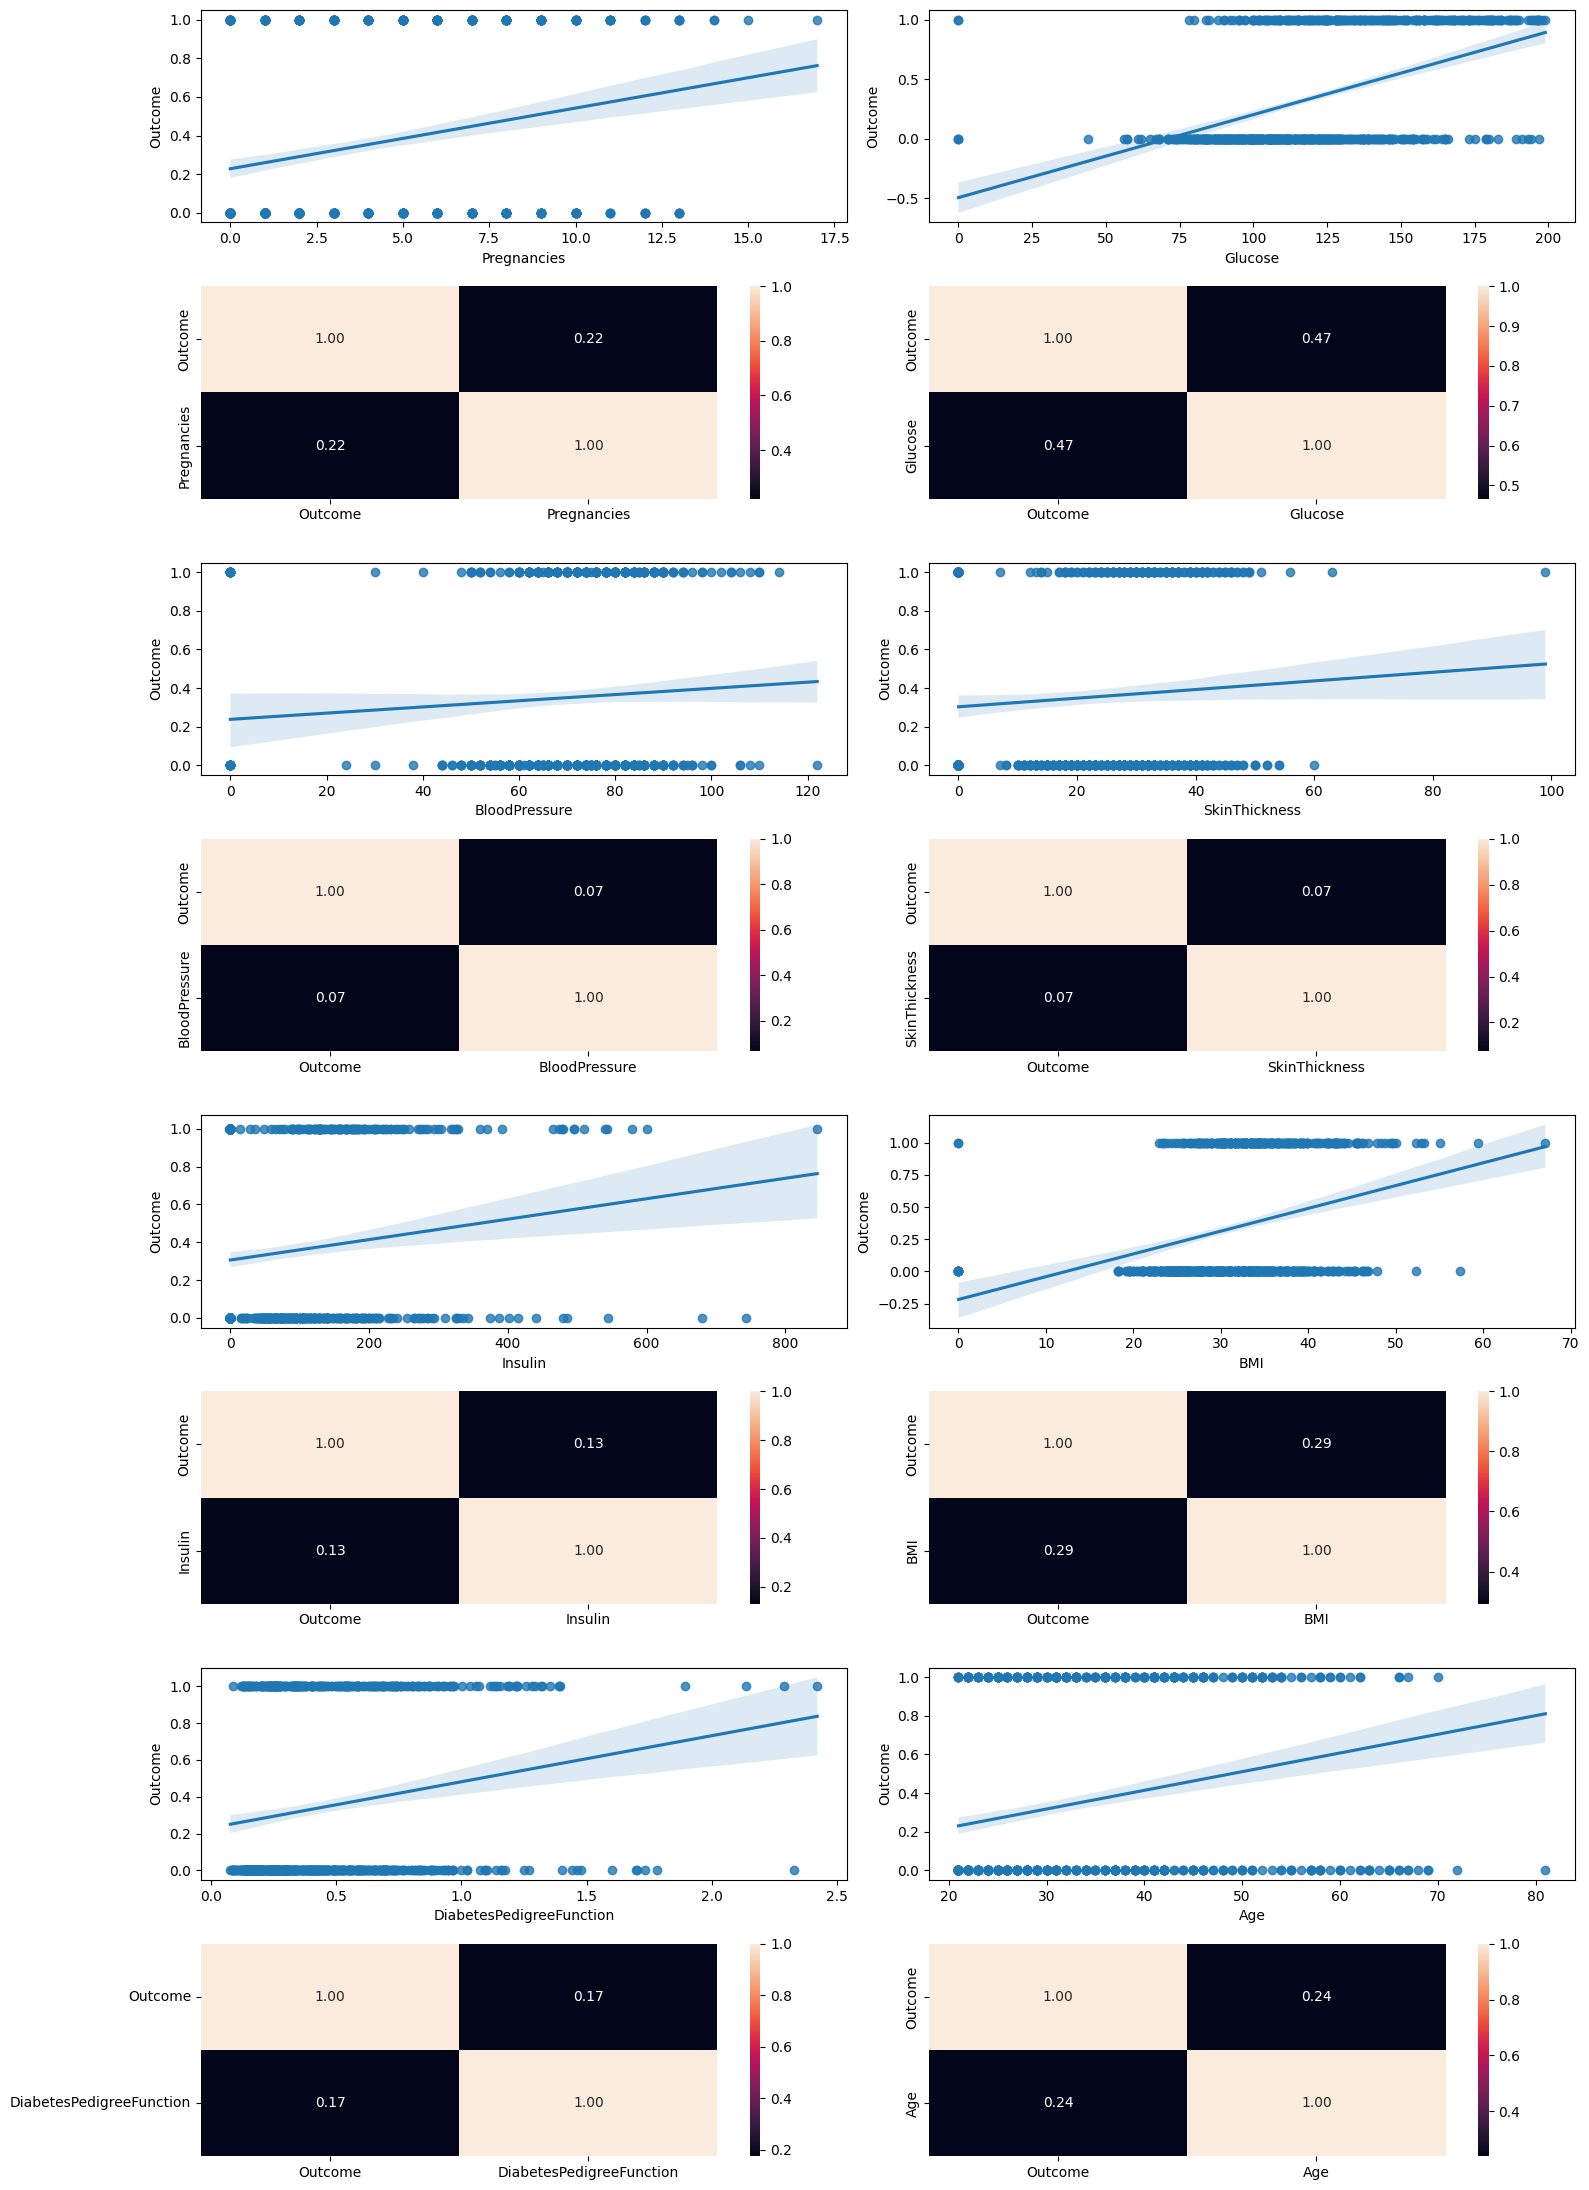

In [170]:
# Multivariate Numerical Data Analysis

# List of column names from your dataset
column_names = total_data.loc[:, total_data.columns != 'Outcome'].columns

# Create the subplots with custom height ratios
fig, axis = plt.subplots(8, 2, figsize=(16, 22))

# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(column_names):
    if i % 2 == 0:
        sns.regplot(ax=axis[i, 0], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i + 1, 0])
    else:
        sns.regplot(ax=axis[i - 1, 1], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

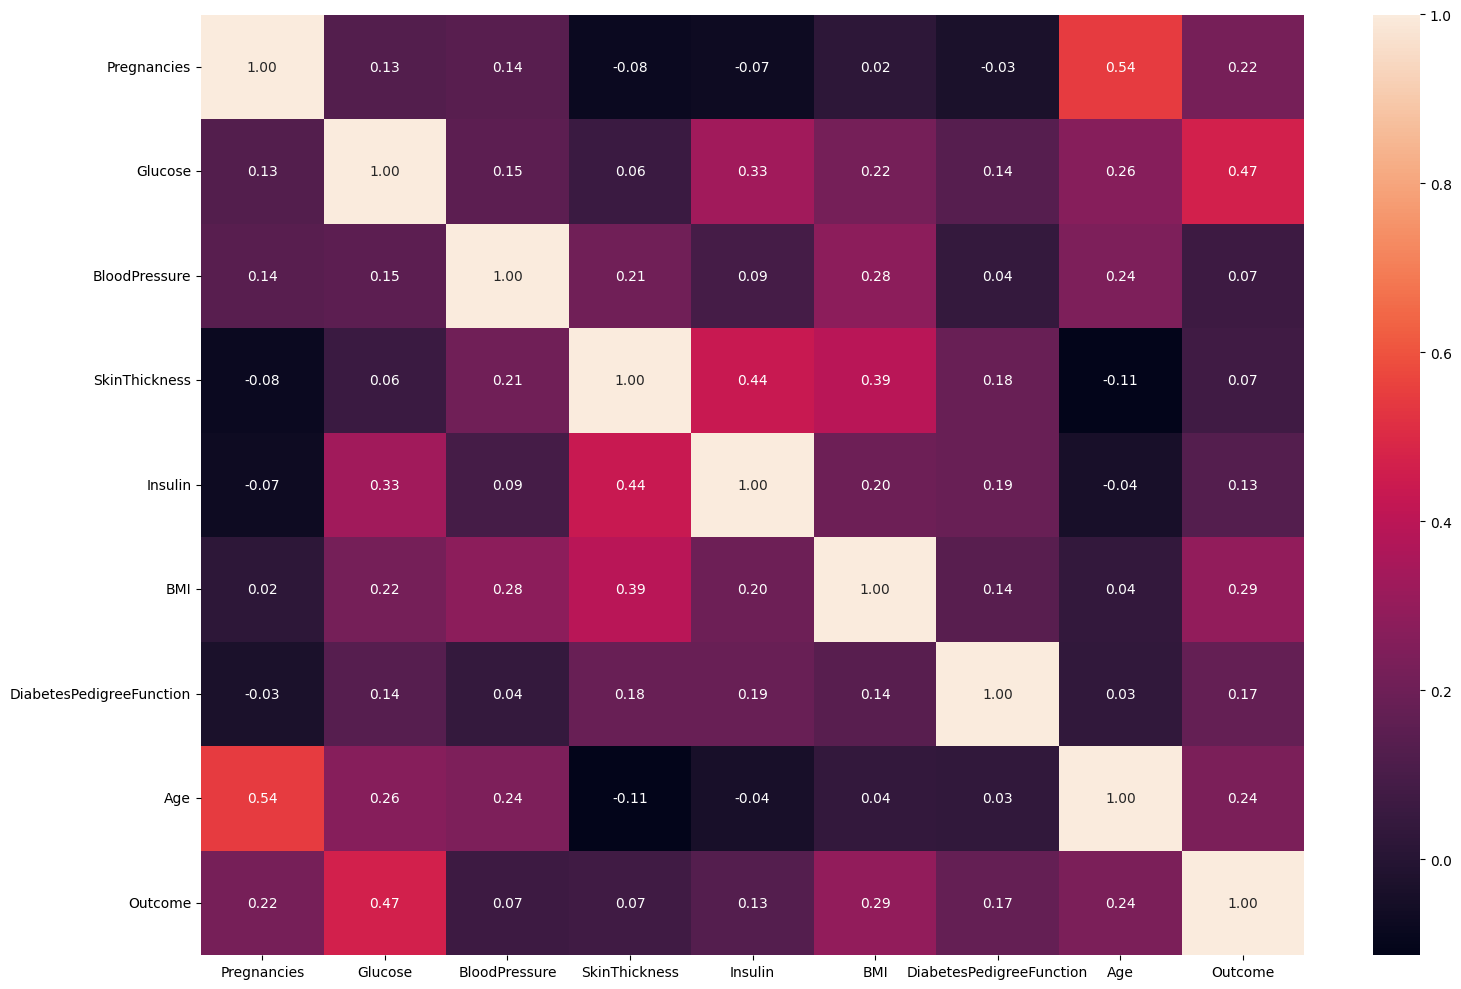

In [171]:
# Heatmap of Dataset

# Draw Figure
fig, axis = plt.subplots(figsize=(16, 10))

# Plot Heatmap

sns.heatmap(total_data.corr(), annot=True, fmt='.2f')

# Adjust Plot
plt.tight_layout()

#Show Plot
plt.show()

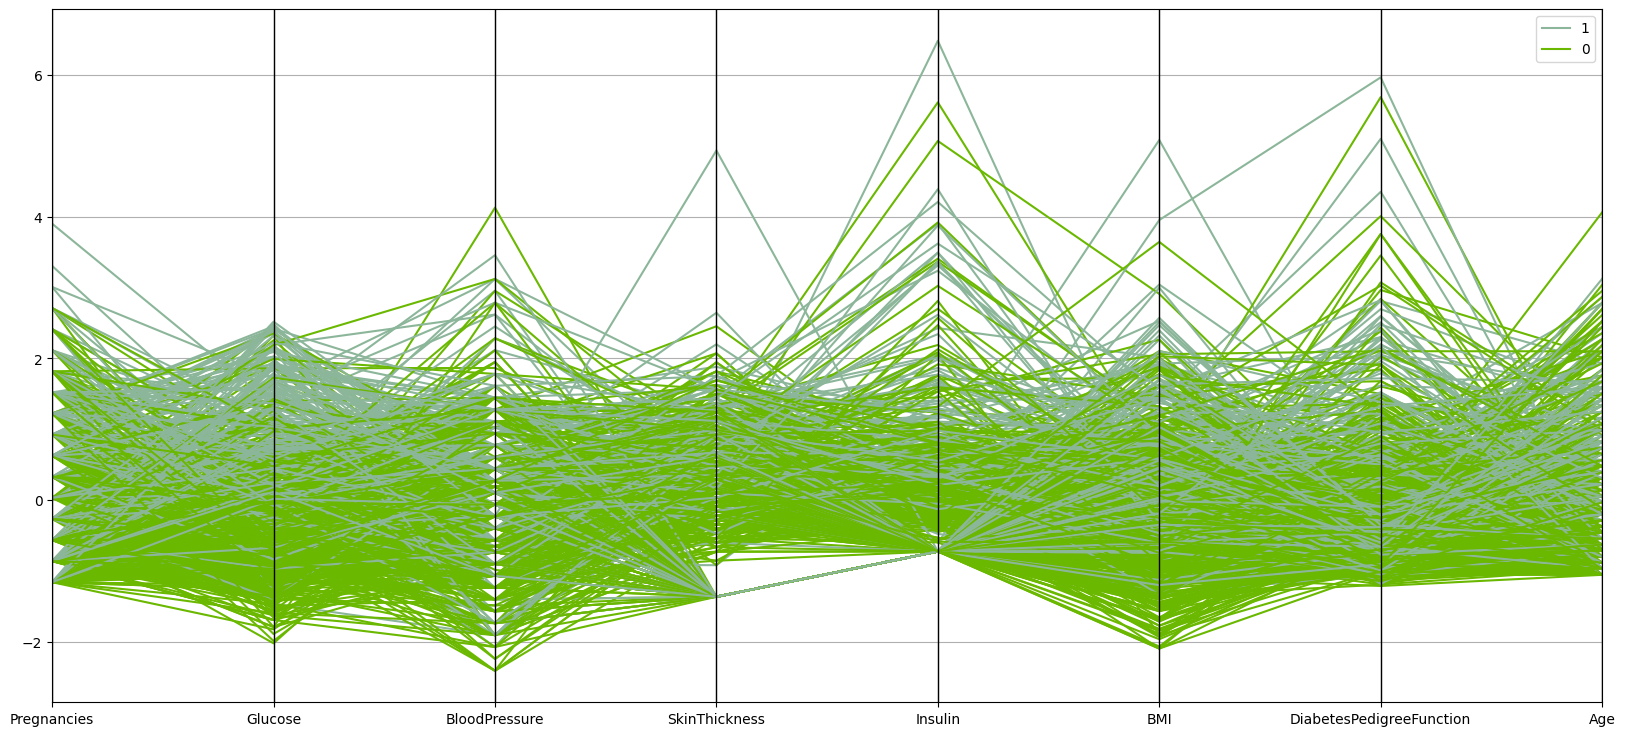

In [172]:
# Plot Parallel Coordinates
total_data = X
total_data['Outcome'] = y

plt.figure(figsize=(20, 9))
pd.plotting.parallel_coordinates(total_data, 'Outcome')
plt.show()

Looking at the Heatmap: 

- Glucose is highly correlated with the Outcome of Being Diabetic
- We can also see that Insulin, BMI, DiabetesPedigreeFunction, Age

#### Feature Engineering

In [173]:
# DataSet Data Description

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02,715.000000
mean,1.490649e-17,-2.186285e-16,3.478181e-17,-5.465713e-17,3.726623e-17,9.192336e-17,-1.068299e-16,-6.707921e-17,0.345455
std,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00,0.475849
min,-1.156061e+00,-2.017789e+00,-2.405266e+00,-1.361317e+00,-7.219658e-01,-2.092196e+00,-1.209241e+00,-1.051738e+00,0.000000
25%,-8.586219e-01,-7.357518e-01,-7.305507e-01,-1.361317e+00,-7.219658e-01,-7.278942e-01,-6.977245e-01,-7.961318e-01,0.000000
50%,-2.637434e-01,-1.769151e-01,-6.066452e-02,1.646955e-01,-3.133194e-01,-9.068671e-03,-2.903487e-01,-3.701220e-01,0.000000
75%,6.285745e-01,6.449035e-01,6.092216e-01,7.369503e-01,4.018118e-01,6.070675e-01,4.753953e-01,6.523014e-01,1.000000
max,3.900407e+00,2.518650e+00,4.126124e+00,4.933485e+00,6.480428e+00,5.081390e+00,5.964248e+00,4.060379e+00,1.000000


In [174]:
# Outliers Cleaning

total_data = total_data[(total_data['Glucose'] > 0) | (total_data['BloodPressure'] > 40) | (total_data['BMI'] > 3) | (total_data['SkinThickness'] < 33 )]


In [175]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               715 non-null    float64
 1   Glucose                   715 non-null    float64
 2   BloodPressure             715 non-null    float64
 3   SkinThickness             715 non-null    float64
 4   Insulin                   715 non-null    float64
 5   BMI                       715 non-null    float64
 6   DiabetesPedigreeFunction  715 non-null    float64
 7   Age                       715 non-null    float64
 8   Outcome                   715 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 55.9 KB


In [176]:
# Null Calculation

total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [177]:
# Normalization 
from sklearn.preprocessing import StandardScaler

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_norm['Outcome'] = total_data['Outcome']
total_data_norm.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.628574,0.842140,-0.060665,0.864118,-0.721966,0.166970,0.472332,1.419119,1
1,-0.858622,-1.228843,-0.563079,0.482615,-0.721966,-0.859923,-0.373049,-0.199718,0
2,1.223453,1.992686,-0.730551,-1.361317,-0.721966,-1.344030,0.610166,-0.114516,1
3,-0.858622,-1.097352,-0.563079,0.101112,0.078300,-0.639875,-0.936637,-1.051738,0
5,0.331135,-0.209788,0.106807,-1.361317,-0.721966,-1.006622,-0.832495,-0.284920,0


In [178]:
# Split DataSet and Select Best Features
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop('Outcome', axis = 1)
y = total_data_norm['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.926014,0.447667,0.106807,-0.947943,0.533592,1.504321
1,0.926014,-0.275533,-0.563079,0.049611,-0.657906,0.737503
2,-0.561183,1.170867,1.446579,-0.126428,1.017542,2.782350
3,0.331135,-0.012551,1.111636,0.328339,-0.559891,-0.029314
4,-1.156061,-0.045424,-0.563079,0.269660,-0.826369,-0.029314


In [179]:
X_train_sel['Outcome'] = list(y_train)
X_test_sel['Outcome'] = list(y_test)

In [180]:
X_train_sel.to_csv("/workspaces/gustavolima-decisiontree/data/processed/train_decision-tree_diabetes.csv", index=False)
X_test_sel.to_csv("/workspaces/gustavolima-decisiontree/data/processed/test_decision-tree_diabetes.csv", index=False)

#### Train the Model

In [181]:
# Train the Data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

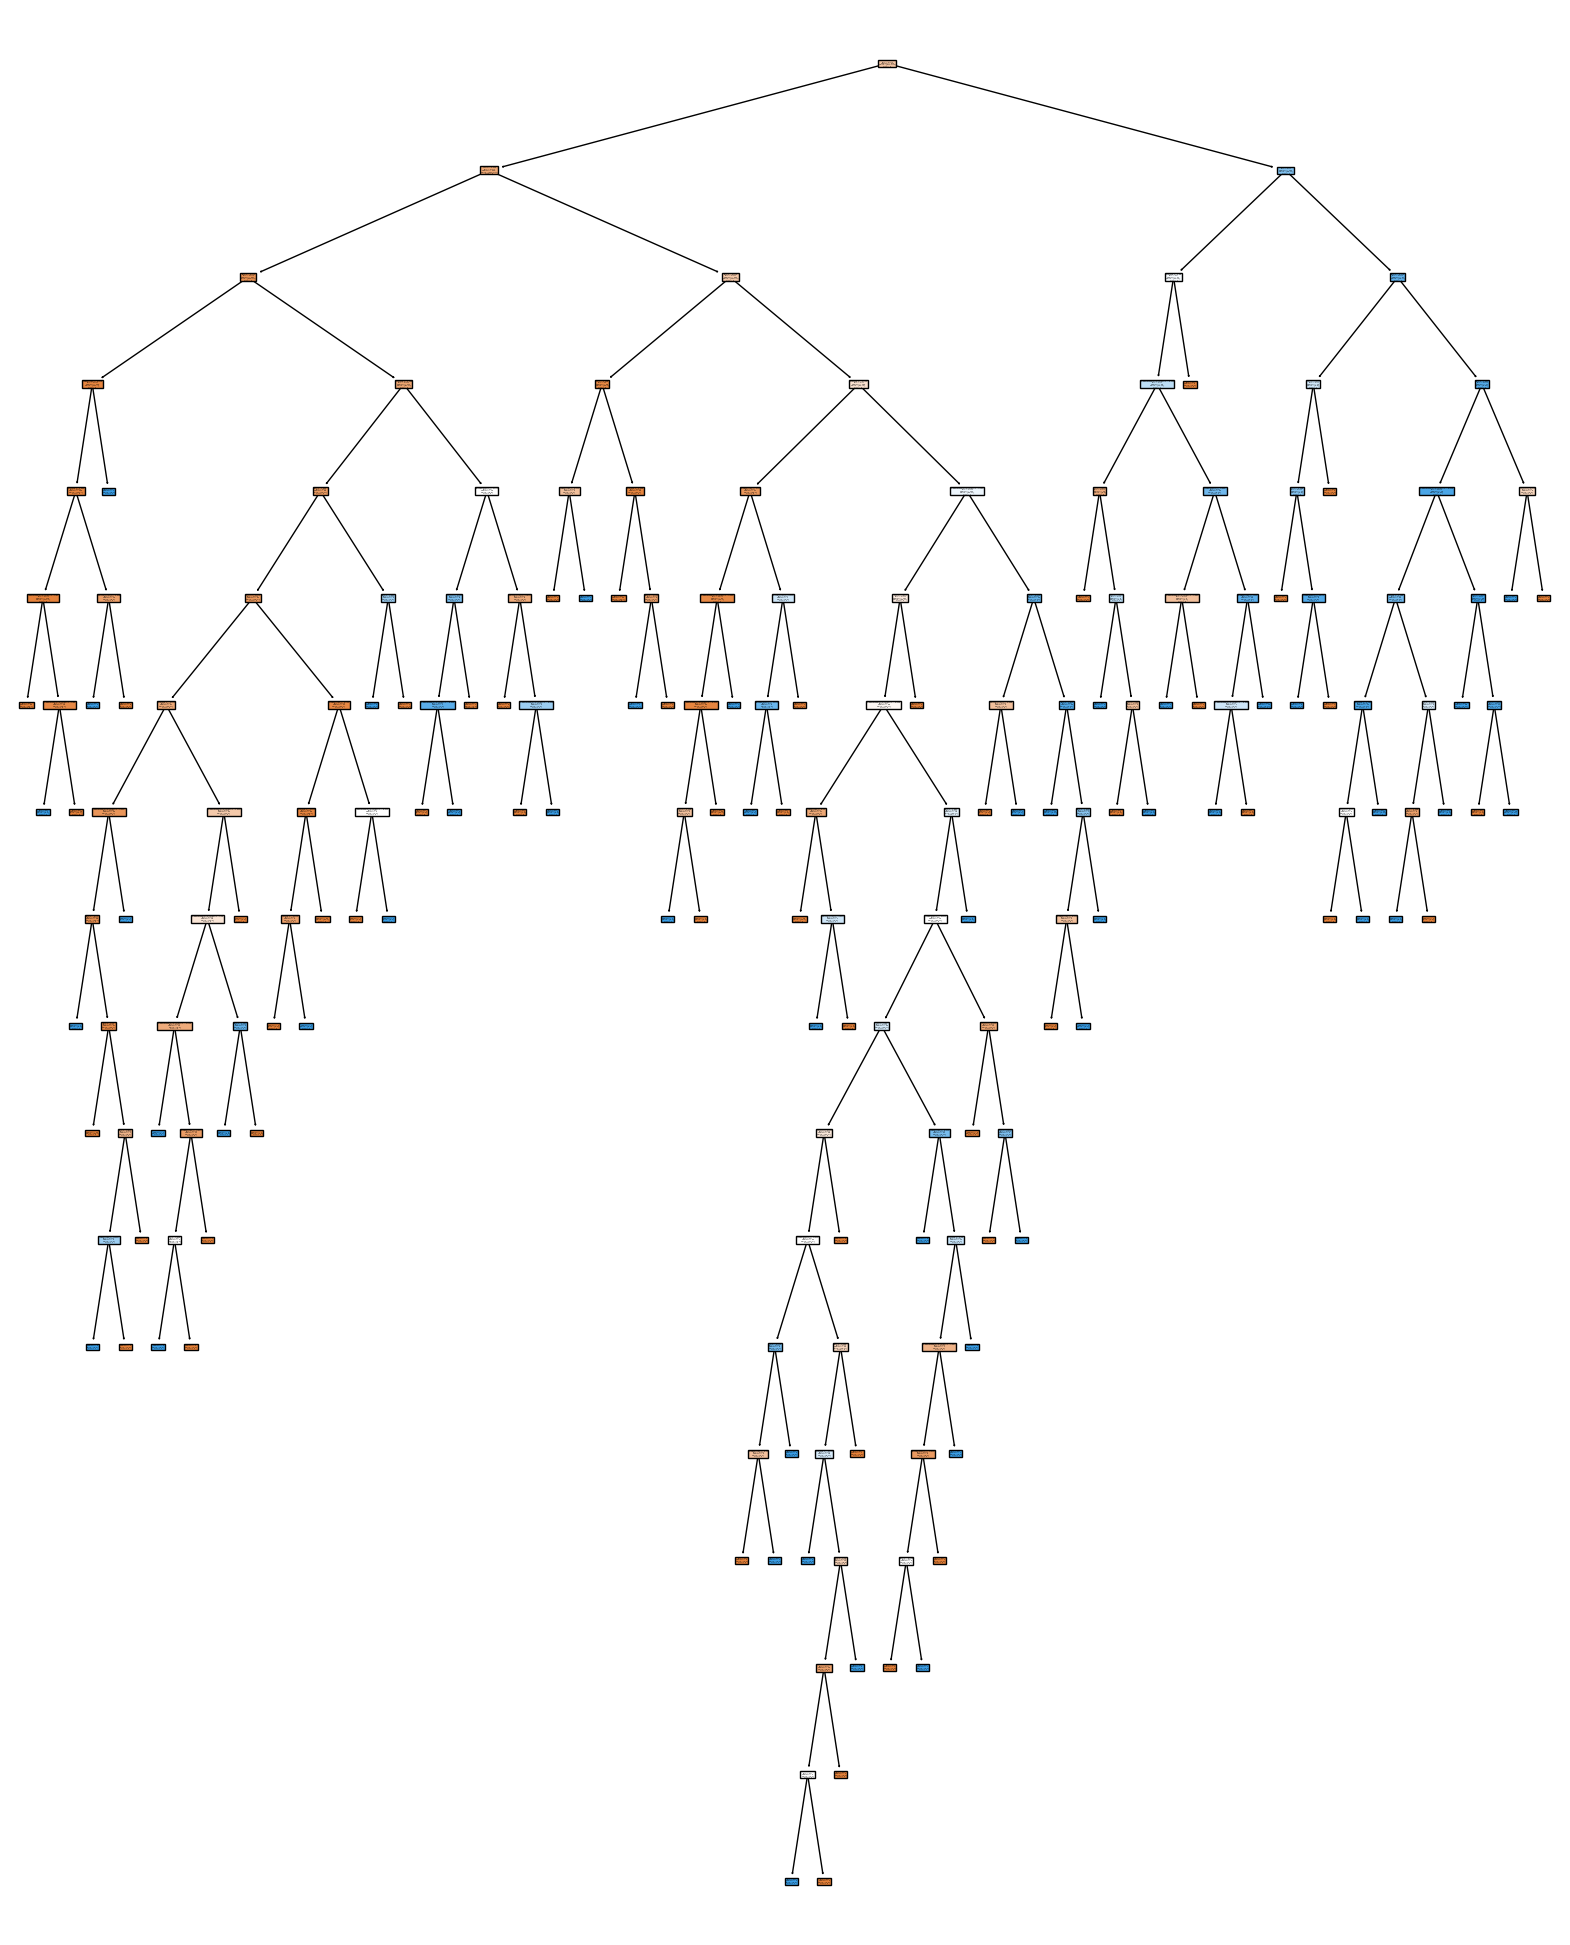

<Figure size 640x480 with 0 Axes>

In [182]:
# Plot the Decision Tree
from sklearn import tree

fig = plt.figure(figsize=(20,25))

tree.plot_tree(model,
               feature_names = list(X_train.columns),
               class_names = ["0", "1"],
               filled = True)

plt.show()
plt.savefig('/workspaces/gustavolima-decisiontree/assets/tree.png')

In [183]:
# Model Prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [184]:
# Check Accuracy
from sklearn.metrics import accuracy_score

print(f'The Accuracy is: {accuracy_score(y_test, y_pred)}')

The Accuracy is: 0.6713286713286714


In [185]:
# Save the Model
from pickle import dump

dump(model, open("/workspaces/gustavolima-decisiontree/models/decision_tree_classifier_default_42.sav", "wb"))